In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("Files/merchant_fill_nonulls.csv", index_col = 0)
df.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0
2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular,18.0,23.0,8.0,7.0,43.0
3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular,7.0,8.0,5.0,5.0,22.0
4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular,1.0,2.0,2.0,1.0,1.0


In [6]:
# Partiendo del conjuntos de datos contestad a las siguientes preguntas:

# 1. La variable price representa el precio de los productos. 
# Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. 
# Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

# Media price
media_price = df['price'].mean()
print("La media es:",media_price)
# La media es la suma de todos los números entre el total de datos. Representa el valor al que más se acerca el conjunto de todos los datos.

# Mediana prize
mediana_price = df['price'].median()
print("La mediana es:",mediana_price)
# La mediana es el valor que queda en medio cuando ordenamos los datos de menor a mayor. Y representa el valor o valores que quedan en el medio de la muestra.


La media es: 8.325371900826447
La mediana es: 8.0


In [7]:
from itertools import combinations

In [11]:
# 2. Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. 
# Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

columnas = ['price','retail_price','units_sold','rating_sold','rating_count']
# Vamos a hacer las combinaciones posibles de columnas

combinaciones = list(combinations(columnas, 2))

combinaciones

[('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_sold'),
 ('price', 'rating_count'),
 ('retail_price', 'units_sold'),
 ('retail_price', 'rating_sold'),
 ('retail_price', 'rating_count'),
 ('units_sold', 'rating_sold'),
 ('units_sold', 'rating_count'),
 ('rating_sold', 'rating_count')]

In [12]:
# Función para identificar las relaciones entre las variables son lineales o no:

def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('price', 'retail_price'), ('price', 'units_sold'), ('price', 'rating_sold'), ('price', 'rating_count'), ('retail_price', 'units_sold'), ('retail_price', 'rating_sold'), ('retail_price', 'rating_count'), ('units_sold', 'rating_sold'), ('units_sold', 'rating_count'), ('rating_sold', 'rating_count')]


In [14]:
df_correlaciones = df.corr( method = 'spearman', numeric_only=True)
df_correlaciones

,price,retail_price,units_sold,rating_sold,rating_count,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
price,1.000000,0.536104,0.061769,0.055564,0.129345,0.859152,-0.016446,-0.062895,0.000385,-0.129033,-0.050126,0.006612,0.055174,0.000385,0.882704,0.453215,0.065397,0.129116,0.129464,0.113892,0.105915,0.116479,0.129430
retail_price,0.536104,1.000000,-0.027991,0.043173,0.024439,0.458731,0.124274,-0.046901,0.013592,-0.170829,-0.118256,-0.053186,0.032367,0.013592,0.506670,0.914495,-0.007313,-0.675246,0.042979,0.029936,0.033661,0.019197,0.043657
units_sold,0.061769,-0.027991,1.000000,0.026794,0.941988,0.066510,0.058934,0.058762,0.467947,0.007856,0.743758,0.854540,0.215589,0.467947,0.034262,-0.025763,0.821012,0.091436,0.841298,0.849927,0.834474,0.833819,0.848140
rating_sold,0.055564,0.043173,0.026794,1.000000,0.046749,0.069522,0.072435,-0.029712,0.052310,-0.094178,-0.004688,0.028503,0.253510,0.052310,0.051745,0.050278,0.044784,-0.017446,0.196560,0.105787,0.038059,-0.036727,0.268168
rating_count,0.129345,0.024439,0.941988,0.046749,1.000000,0.130921,0.056153,0.052848,0.470281,-0.026791,0.690538,0.807655,0.244870,0.470281,0.102488,0.024491,0.855074,0.081600,0.893646,0.891046,0.875202,0.869495,0.896480
shipping_option_price,0.859152,0.458731,0.066510,0.069522,0.130921,1.000000,-0.012647,-0.059761,0.021646,-0.127743,-0.029481,0.030758,0.059602,0.021646,0.762732,0.404595,0.081886,0.125062,0.141742,0.126799,0.117662,0.129449,0.141471
countries_shipped_to,-0.016446,0.124274,0.058934,0.072435,0.056153,-0.012647,1.000000,-0.029577,0.206918,-0.015335,0.067764,0.075738,0.158419,0.206918,-0.015715,0.166046,0.069599,-0.158177,0.064113,0.059956,0.053646,0.028971,0.066870
inventory_total,-0.062895,-0.046901,0.058762,-0.029712,0.052848,-0.059761,-0.029577,1.000000,0.018107,0.086190,0.088131,0.068210,-0.079420,0.018107,-0.064300,-0.045094,0.064528,-0.004447,0.057947,0.067969,0.062350,0.064416,0.055552
merchant_rating_count,0.000385,0.013592,0.467947,0.052310,0.470281,0.021646,0.206918,0.018107,1.000000,0.282848,0.635576,0.598192,0.251161,1.000000,0.006601,0.059850,0.615972,-0.020919,0.442943,0.443660,0.415077,0.416399,0.440822
listed_products,-0.129033,-0.170829,0.007856,-0.094178,-0.026791,-0.127743,-0.015335,0.086190,0.282848,1.000000,0.509894,0.158998,-0.152354,0.282848,-0.129337,-0.114864,0.136660,0.088786,-0.030774,-0.014926,-0.017040,-0.013238,-0.037889


<Axes: >

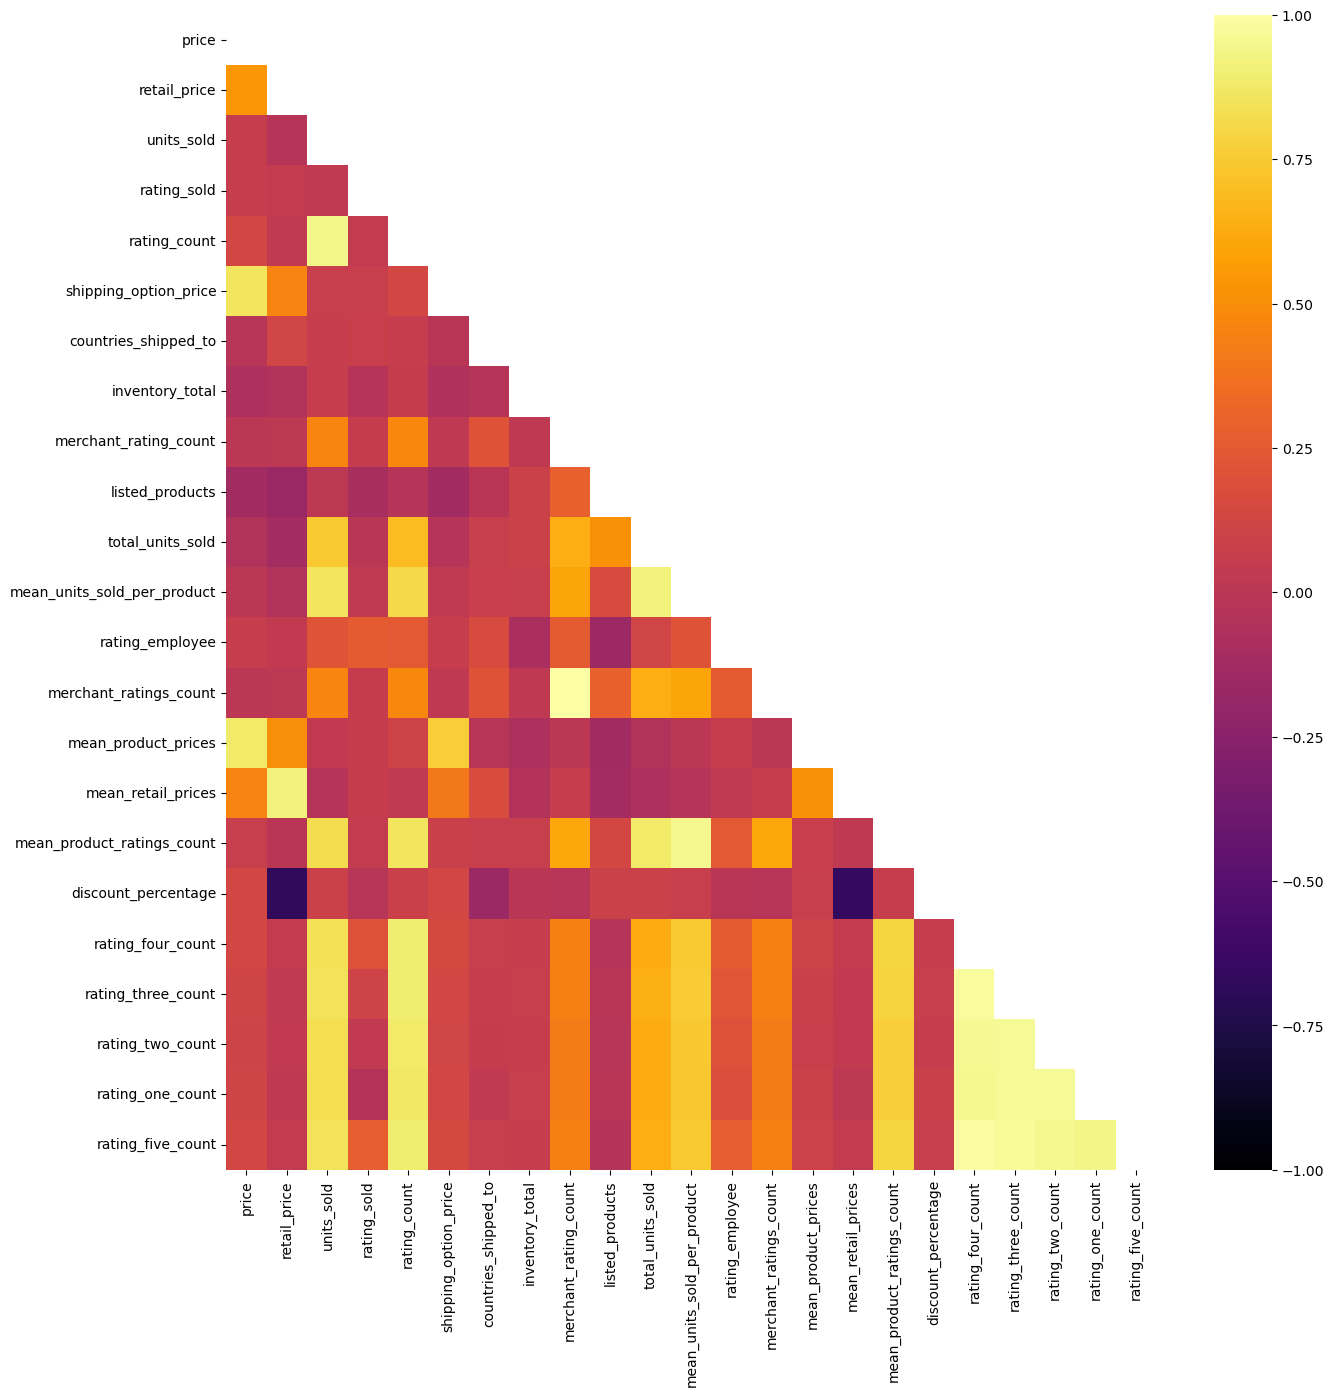

In [31]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15,15))

# para evitar cuadrados duplicados en el gráfico
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "inferno", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1,  # para identificar el valor mínimo de nuestra escala de colores
            mask = mask
            )


# La 'retail_price' tiene una correlación muy fuerte NEGATIVA con el 'discount_percentage' (r > 0.7)
# La 'mean_retail_price' tiene una correlación muy fuerte NEGATIVA con el 'discount_percentage' (r > 0.7)

In [ ]:
# 3. Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. 
# ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.



In [ ]:








Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y badge_fast_shipping. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

Calcula la media y la mediana de la variable mean_product_prices. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

Realiza un análisis de correlación entre total_units_sold y mean_product_ratings_count. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y seller_reputation. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

Calcula la media y la mediana de la variable discount_percentage. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas badge_fast_shipping y seller_reputation. ¿Qué puedes concluir sobre la distribución de las calificaciones altas?